In [2]:
%matplotlib inline

# import all modules
import sys
import os
import itertools

import IPython.display as ipd
from python_speech_features import mfcc, logfbank
from scipy.io import wavfile
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import confusion_matrix


import fma_utils as fma_utils

plt.rcParams['figure.figsize'] = (17, 5)



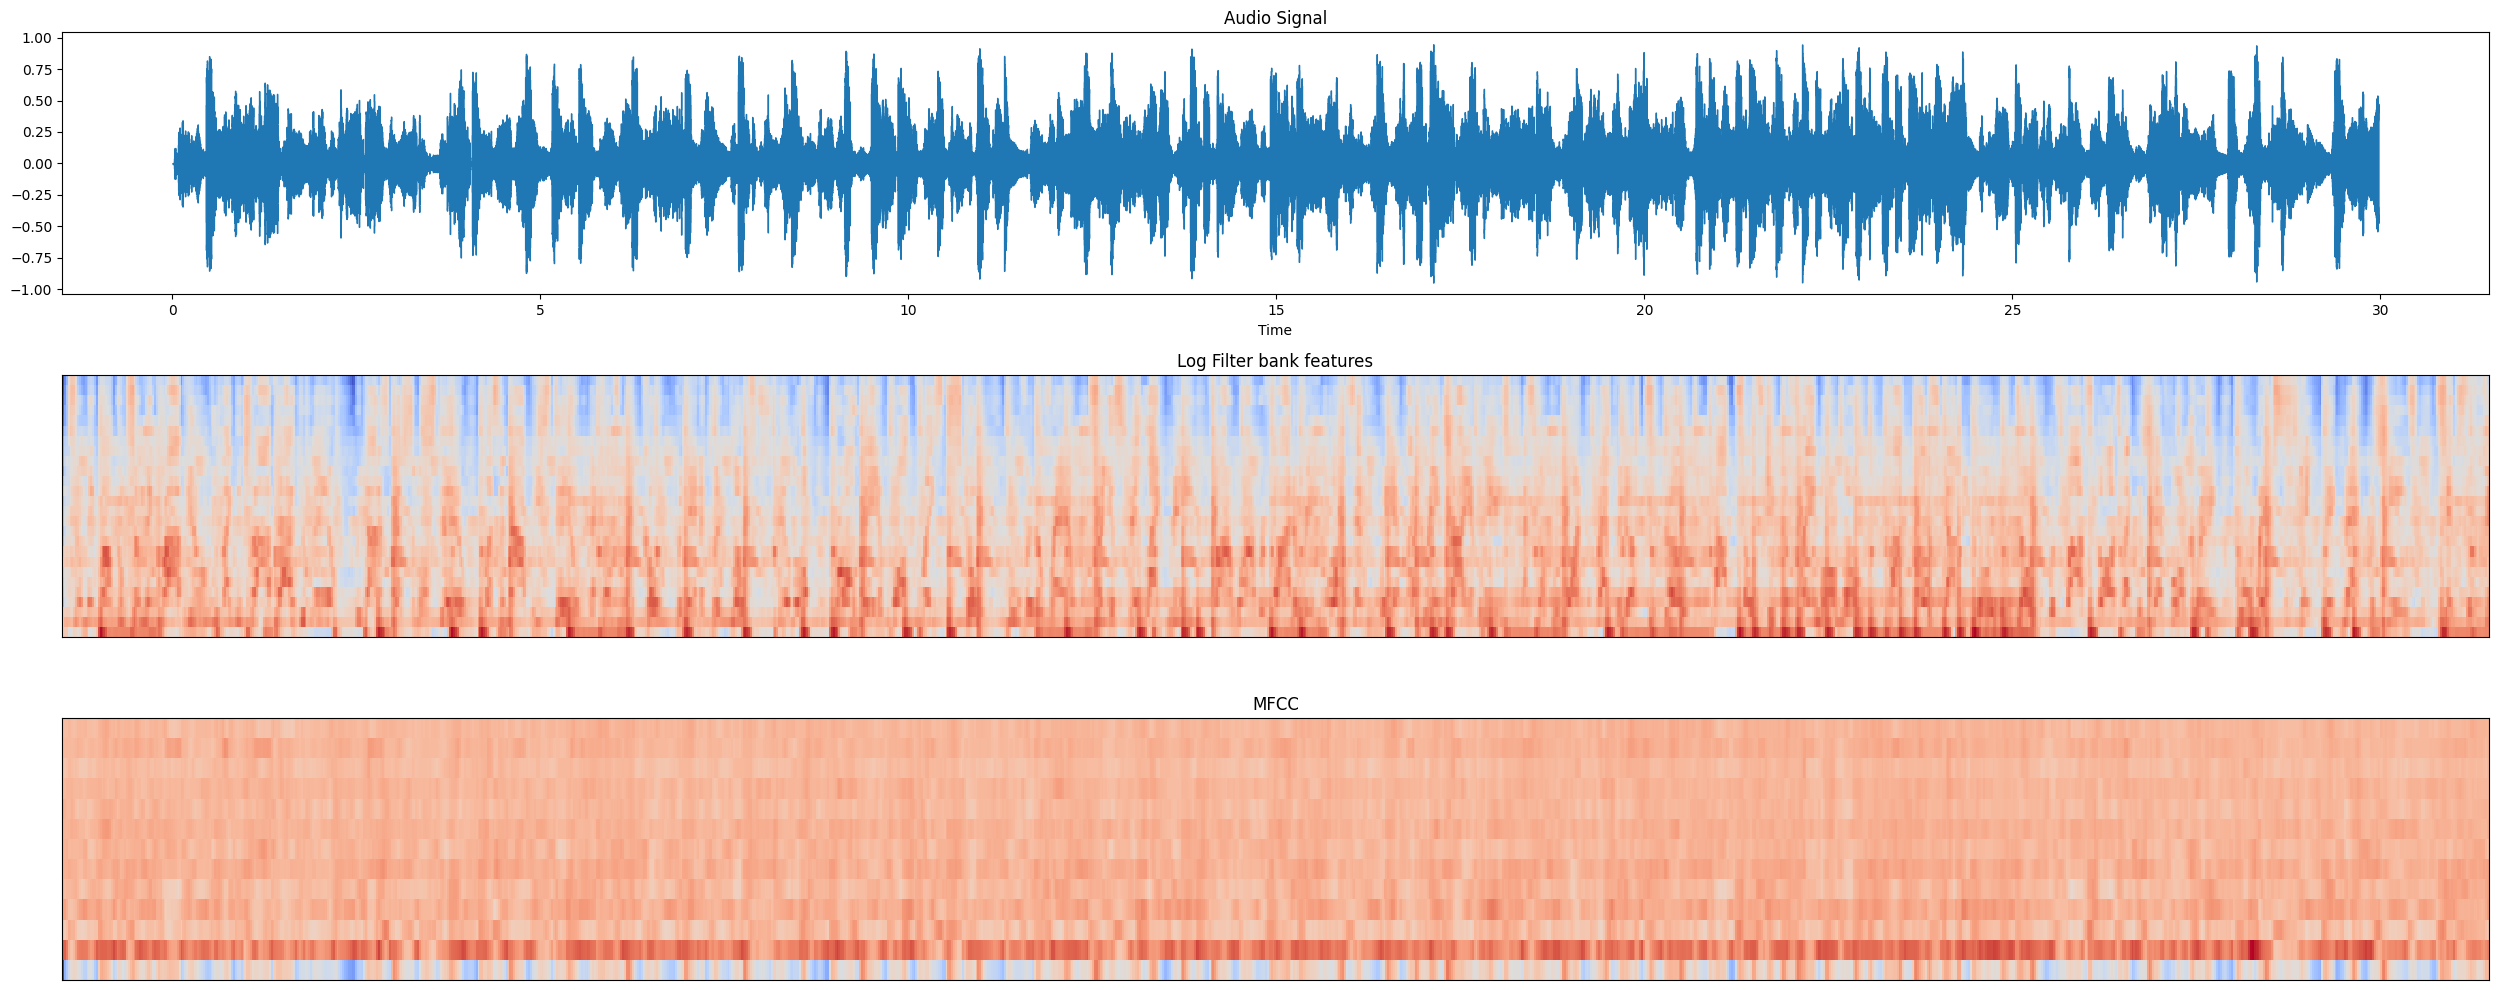

In [3]:
AUDIO_DIR = '../../dataset_process/data/fma_small'
path = fma_utils.get_audio_path(AUDIO_DIR, 2)

audio, sampling_freq = librosa.load(path)

# Extract MFCC features
mfcc_features = librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13)

# Extract filter bank features
filterbank_features = librosa.feature.melspectrogram(y=audio, sr=sampling_freq, n_mels=26)
log_filterbank_features = librosa.power_to_db(filterbank_features)

# Plot the features with bigger size
plt.figure(figsize=(25, 10))
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, sr=sampling_freq)
plt.title('Audio Signal')
plt.subplot(3, 1, 2)
librosa.display.specshow(log_filterbank_features, sr=sampling_freq)
plt.title('Log Filter bank features')
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_features, sr=sampling_freq)
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [4]:
print ('\nMFCC:\nLength of each feature =', mfcc_features.shape[0])
print ('Number of windows =', mfcc_features.shape[1])
print ('\nFilter bank:\nLength of each feature =', filterbank_features.shape[0])
print ('Number of windows =', filterbank_features.shape[1])


MFCC:
Length of each feature = 13
Number of windows = 1291

Filter bank:
Length of each feature = 26
Number of windows = 1291


In [5]:
history

# train model for each genre
X_train_genre = []
y_train_genre = []
for genre in genres:
    X_train_genre.append(X_train[y_train == genre])
    y_train_genre.append(y_train[y_train == genre])

X_test_genre = []
y_test_genre = []
for genre in genres:
    X_test_genre.append(X_test[y_test == genre])
    y_test_genre.append(y_test[y_test == genre])

for i in range(len(genres)):
    print(genres[i], X_train_genre[i].shape, y_train_genre[i].shape)

ipd.display(X_train_genre[0].head())
%matplotlib inline

# import all modules
import sys
import os
import itertools

import IPython.display as ipd
from python_speech_features import mfcc, logfbank
from scipy.io import wavfile
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import confusion_matrix


import fma_utils as fma_utils

plt.rcParams['figure.figsize'] = (17, 5)
AUDIO_DIR = '../../dataset_process/data/fma_small'
path = fma_utils.get_audio_path(AUDIO_DIR,

In [6]:
import glob
import os.path as path

metadata_path = '../../dataset_process/data/fma_metadata/'
tracks = fma_utils.load(metadata_path + 'tracks.csv')
genres = fma_utils.load(metadata_path + 'genres.csv')
features = fma_utils.load(metadata_path + 'features.csv')
echonest = fma_utils.load(metadata_path + 'echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index) # check that the index is the same


,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
140,128000,0,NaN,2008-11-26 01:44:07,2008-11-26,253,5,Folk,[17],[17],NaN,1593,en,Attribution-Noncommercial-No Derivative Works ...,1299,NaN,2,NaN,[],Queen Of The Wires
141,128000,0,NaN,2008-11-26 01:44:10,2008-11-26,182,1,Folk,[17],[17],NaN,839,en,Attribution-Noncommercial-No Derivative Works ...,725,NaN,4,NaN,[],Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154308,320000,0,NaN,2017-03-05 04:58:50,NaT,194,2,Hip-Hop,"[21, 539, 811]","[811, 539, 21]",NaN,3371,NaN,Attribution,2705,NaN,17,NaN,"[fleslit, trap beat free use, trap beat free d...",MIA
154309,320000,0,NaN,2017-03-05 04:58:52,NaT,162,5,Hip-Hop,"[21, 539, 811]","[811, 539, 21]",NaN,4525,NaN,Attribution,3589,NaN,18,NaN,"[fleslit, trap beat free use, trap beat free d...",A1 Symphony
154413,320000,0,NaN,2017-03-07 18:46:39,NaT,349,0,Pop,[76],"[10, 76]",NaN,809,NaN,Creative Commons Attribution-NonCommercial-NoD...,676,NaN,9,NaN,[],Do Easy


(track, genre_top)
Electronic             1000
Experimental           1000
Folk                   1000
Hip-Hop                1000
Instrumental           1000
International          1000
Pop                    1000
Rock                   1000
Blues                     0
Classical                 0
Country                   0
Easy Listening            0
Jazz                      0
Old-Time / Historic       0
Soul-RnB                  0
Spoken                    0
Name: count, dtype: int64
['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']


<Figure size 1700x500 with 0 Axes>

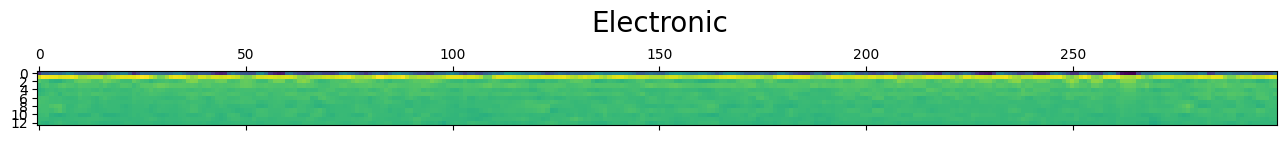

<Figure size 1700x500 with 0 Axes>

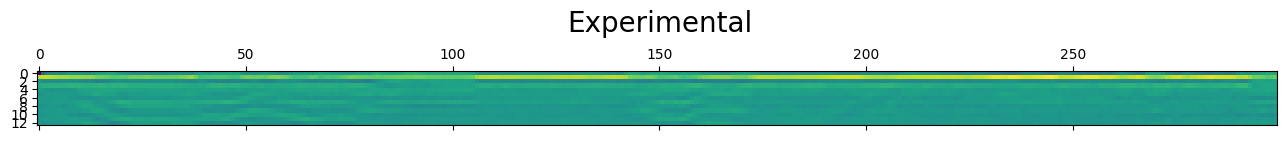

<Figure size 1700x500 with 0 Axes>

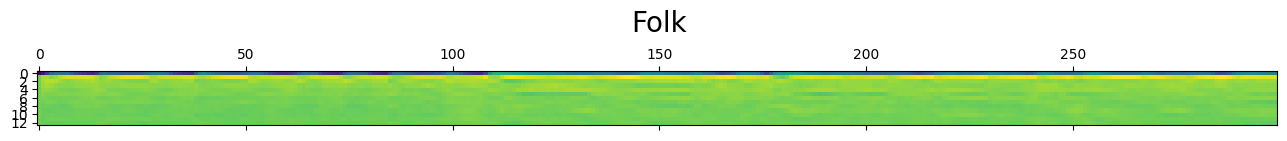

<Figure size 1700x500 with 0 Axes>

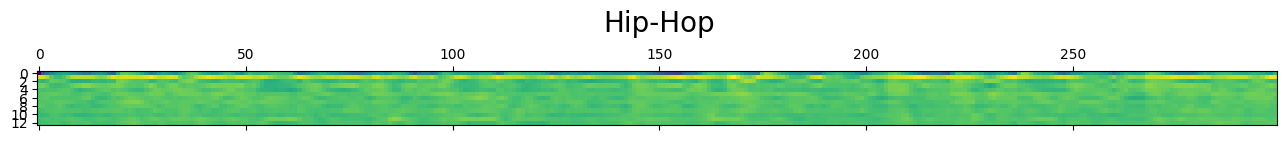

<Figure size 1700x500 with 0 Axes>

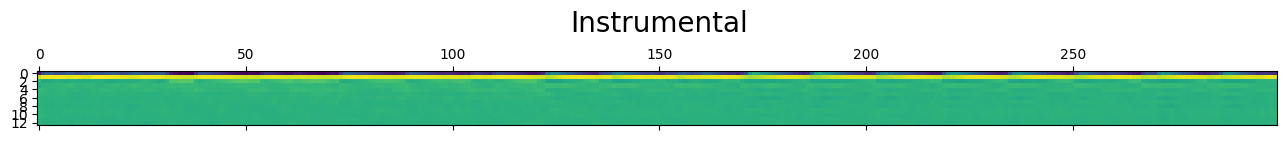

<Figure size 1700x500 with 0 Axes>

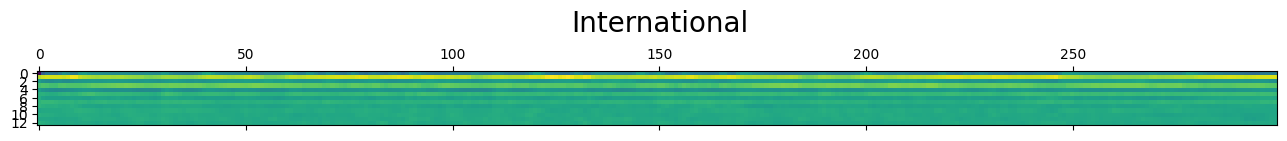

<Figure size 1700x500 with 0 Axes>

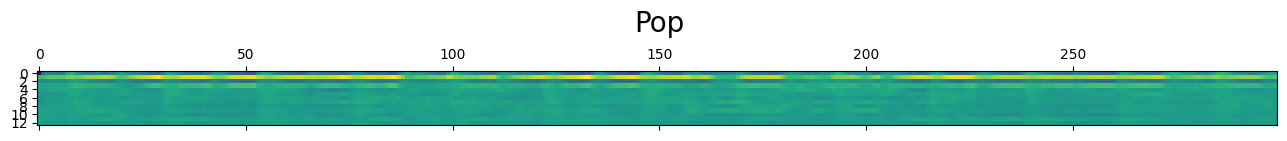

<Figure size 1700x500 with 0 Axes>

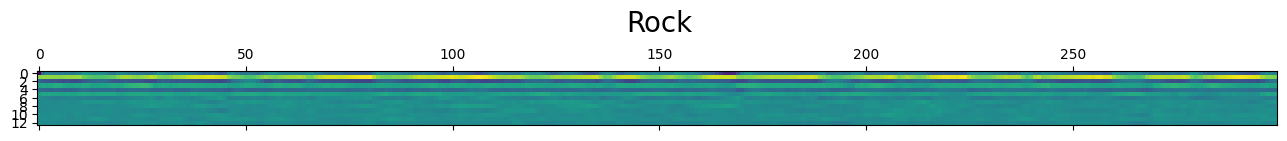

In [7]:
plt.rcParams['figure.figsize'] = (17, 5)
small_set = tracks['set', 'subset'] <= 'small'


# small set is consist of 8 genres and 8000 tracks.
# first from each genre, we select one track and visualize it.

# get the first track from each genre
tracks_small = tracks[small_set]

ipd.display(tracks_small['track'])
val_count = tracks_small['track', 'genre_top'].value_counts()

print(val_count)

# get non-zero genres and append name 
categories = []

for i in range(len(val_count)):
    if val_count.iloc[i] > 0: 
        categories.append(val_count.index[i])

print(categories)

# get the first track from each genre

for top_genre in categories:
    track_id = tracks_small[tracks_small['track', 'genre_top'] == top_genre]['track', 'genre_top'].index[0]
    path = fma_utils.get_audio_path(AUDIO_DIR, track_id)
    audio, sampling_freq = librosa.load(path)
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13)

    plt.figure(figsize=(17, 5))
    plt.yscale = 'linear'
    plt.matshow(mfcc_features[:,:300])
    plt.text(150, -10, top_genre, horizontalalignment='center', fontsize=20)

    # plot mfcc features
    

    plt.show()

In [23]:
small = tracks['set', 'subset'] <= 'small'
genres = list(set(tracks[small]['track', 'genre_top']))

train = tracks['set', 'split'] == 'training'
validate = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

X = features.loc[small, 'mfcc']
y = tracks.loc[small, ('track', 'genre_top')]

print('X:', X.shape, 'y:', y.shape)

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

ipd.display(y_train.head())
ipd.display(X_train.head())

genres

X: (8000, 140) y: (8000,)
X_train: (6400, 140) y_train: (6400,)
X_test: (800, 140) y_test: (800,)


track_id
2      Hip-Hop
5      Hip-Hop
10         Pop
140       Folk
141       Folk
Name: (track, genre_top), dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
5           2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10          5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
140         0.384906  1.203378  0.429393  0.639471 -0.080144 -0.440946   
141        -0.038922  4.771146 -0.378949 -0.309047 -0.661308 -0.531602   

statistics                                          ...        std            \
number            07        08        09        10  ...         11        12   
track_id                                            ...                        
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609  8.601942   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638  9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734  7.985110   
140        -0.432567 -0.126163  0.507695  0.408915  ...   9.883532  8.250456   
141         0.029186  0.662524 -0.084562  0.965640  ...   9.464321  8.119837   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
140         8.085891  8.114858  8.832722  8.157245  7.297486  7.734456   
141         8.918522  8.059117  9.339061  8.451561  8.426965  8.341757   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
5           8.452527  7.334442  
10          6.430473  6.186294  
140         7.807103  7.986255  
141         8.572934  9.351485  

[5 rows x 140 columns]

['Experimental',
 'Rock',
 'Instrumental',
 'International',
 'Hip-Hop',
 'Folk',
 'Electronic',
 'Pop']

In [15]:
# train model for each genre
X_train_genre = []
y_train_genre = []
for genre in genres:
    X_train_genre.append(X_train[y_train == genre])
    y_train_genre.append(y_train[y_train == genre])

X_test_genre = []
y_test_genre = []
for genre in genres:
    X_test_genre.append(X_test[y_test == genre])
    y_test_genre.append(y_test[y_test == genre])

for i in range(len(genres)):
    print(genres[i], X_train_genre[i].shape, y_train_genre[i].shape)

ipd.display(X_train_genre[0].head())

Experimental (1, 112000) (800,)
Rock (1, 112000) (800,)
Instrumental (1, 112000) (800,)
International (1, 112000) (800,)
Hip-Hop (1, 112000) (800,)
Folk (1, 112000) (800,)
Electronic (1, 112000) (800,)
Pop (1, 112000) (800,)


In [18]:
import hmm_trainer as hmm_trainer
# train model for each genre
models = []
for i in range(len(genres)):
    print('training model for genre:', genres[i])
    model = hmm_trainer.HMMTrainer(model_name='GaussianHMM', n_component=10)
    feature = np.array(X_train_genre[i]).reshape(-1, 1)
    model.train(feature)
    models.append((genres[i], model))

# test model for each model and select the best one as its genre
y_pred = []
for i in range(len(X_test)):
    best_score = float('-inf')
    pred_genre = None
    for j in range(len(genres)):
        feature = np.array(X_test.iloc[i]).reshape(-1, 1)
        score = models[j][1].get_score(feature)
        if score > best_score:
            best_score = score
            pred_genre = models[j][0]
    y_pred.append(pred_genre)

# calculate accuracy
accuracy = sum(y_pred == y_test) / len(y_test)

training model for genre: Experimental
training model for genre: Rock
training model for genre: Instrumental
training model for genre: International
training model for genre: Hip-Hop
training model for genre: Folk
training model for genre: Electronic
training model for genre: Pop


In [19]:
accuracy

0.24

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.21 0.03 0.1  0.39 0.02 0.   0.25 0.  ]
 [0.15 0.24 0.04 0.5  0.02 0.   0.04 0.01]
 [0.25 0.01 0.   0.67 0.01 0.   0.06 0.  ]
 [0.07 0.01 0.   0.77 0.04 0.   0.11 0.  ]
 [0.04 0.03 0.02 0.17 0.22 0.   0.52 0.  ]
 [0.15 0.   0.01 0.77 0.   0.   0.07 0.  ]
 [0.09 0.05 0.01 0.21 0.15 0.   0.48 0.01]
 [0.08 0.02 0.01 0.45 0.08 0.   0.36 0.  ]]


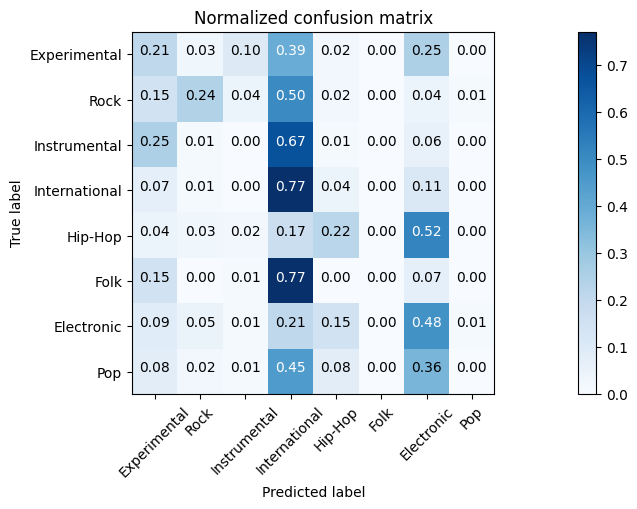

In [21]:
# plot confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=genres)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=genres, normalize=True,
                      title='Normalized confusion matrix')
plt.show()